# MNIST

<데이터 표현>$\\$
image 데이터는 28x28형태의 데이터로 표현된다 $\\$
이를 pytorch에서는 X.view(-1,28*28) => 784개 데이터로 표현한다$\\$

<딥러닝에서 사용되는 용어>$\\$
-epoch : all the training데이터가 모두 한번 학습이 되었다$\\$
-batch size : 60000개 데이터를 한번에 학습하기에는 무리이므로 짤라서 활용함. 이때 짜르는 크기기준=batch size$\\$
즉 batch size=100이라면, 100개 데이터 단위로 쪼개니까 600개 batch가 생성됨$\\$
-iteration :  batch를 몇번 학습에 사용되었나$\\$
ex)training data=1000, batch size=500이면 batch는 2개존재함. 만약 1epoch를 돌았다면, 2iteration를 돈것임$\\$

In [16]:
import torch

#유명한 데이터셋들, 모델, transform(전처러)등 다양한 라이브러리 제공
import torchvision.datasets as dsets
import torchvision.transforms as transforms


import matplotlib.pyplot as plt
import random


In [17]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [18]:
# parameters
training_epochs = 15
batch_size = 100

In [19]:
# MNIST dataset
#root : 불러올 파일경로
#train : true이면 train데이터를 false이면 test데이터를 불러옴
#transform : 데이터변환형식 => 기존 image데이터는 High,Weight,Channel형식으로 0-255값을 가짐
#pytorch방식으로 변환해줌 => C H W형식으로 0-1값을 가지게 변환
#download : 다운로드 안되어있으면 다운
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [20]:
# dataset loader
#batch_size : 몇개씩 잘라서 데이터 불러올래
#shuffle 있는 순서 or 무작위로 데이터 불러올래
#drop_last : 맨 뒤에 남은 이상한 숫자가 있는 데이터들 처리를 제거할것인가
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [21]:
#28x28=784개의 데이터를 이용해서 10개의 분류를 예측함
#10개의 분류는 0-9숫자를 의미함
linear = torch.nn.Linear(784,10,bias=True).to(device)
linear,list(linear.parameters())

(Linear(in_features=784, out_features=10, bias=True),
 [Parameter containing:
  tensor([[-2.9863e-02, -6.3304e-04, -6.9076e-03,  ..., -1.8779e-02,
            3.0876e-02, -3.1737e-02],
          [ 6.7273e-03,  2.0005e-02, -2.4505e-02,  ..., -2.7296e-02,
           -3.8136e-03,  1.1463e-03],
          [-1.7847e-02, -2.9822e-02,  7.4010e-05,  ..., -3.2111e-02,
            2.6378e-02,  3.2280e-02],
          ...,
          [-1.3945e-02,  3.2514e-02,  2.6534e-03,  ..., -3.2780e-02,
           -1.6748e-02, -5.4733e-03],
          [ 1.0081e-02, -1.2429e-02, -1.0554e-02,  ..., -2.0057e-02,
           -9.3248e-04,  8.3561e-03],
          [-6.6728e-03,  7.1139e-03,  2.5636e-02,  ...,  1.9851e-02,
           -1.8774e-02, -3.2610e-02]], requires_grad=True),
  Parameter containing:
  tensor([-0.0229, -0.0224,  0.0170, -0.0287, -0.0111,  0.0345,  0.0230,  0.0343,
           0.0262, -0.0135], requires_grad=True)])

In [22]:
#손실함수로 크로스 엔트로피를 이용
#pytorch에서는 크로스 엔트로피 연산은 자동으로 softmax계산을 해주므로 따로 작성X
criterion = torch.nn.CrossEntropyLoss().to(device)
criterion

CrossEntropyLoss()

In [23]:
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [24]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    #X는 28x28개의 데이터
    #y는 label데이터
    for X, Y in data_loader:
      
        #28x28개 데이터를  784개 데이터로 표현
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        #주어진 모델로 X에 대한 분류값 예측
        hypothesis = linear(X)

        #예측값-실제값을 크로스엔트로피를 이용해서 손실함수 계산
        cost = criterion(hypothesis, Y) 

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.535150588
Epoch: 0002 cost = 0.359577715
Epoch: 0003 cost = 0.331264257
Epoch: 0004 cost = 0.316404670
Epoch: 0005 cost = 0.307106972
Epoch: 0006 cost = 0.300456554
Epoch: 0007 cost = 0.294933408
Epoch: 0008 cost = 0.290956169
Epoch: 0009 cost = 0.287074119
Epoch: 0010 cost = 0.284515619
Epoch: 0011 cost = 0.281914055
Epoch: 0012 cost = 0.279526889
Epoch: 0013 cost = 0.277636588
Epoch: 0014 cost = 0.275874794
Epoch: 0015 cost = 0.274422735
Learning finished


In [25]:
#test데이터니까 gradient계산은 않마(성능평가)
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

Accuracy: 0.8883000016212463


Label:  8
Prediction:  3


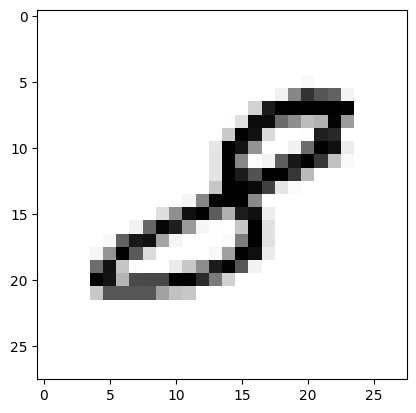

In [26]:
# Get one and predict
r = random.randint(0, len(mnist_test) - 1)
X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

print('Label: ', Y_single_data.item())
single_prediction = linear(X_single_data)
print('Prediction: ', torch.argmax(single_prediction, 1).item())

plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
plt.show()